In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris = load_iris()

#print(iris.DESCR)

In [2]:
iris.data[:5,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [3]:
print(iris.target_names, iris.feature_names)
iris.target[:5]

['setosa' 'versicolor' 'virginica'] ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


array([0, 0, 0, 0, 0])

In [4]:
iris_pd = pd.DataFrame(iris.data, columns=iris.feature_names)

iris_pd.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
iris_pd['Class'] = iris.target

iris_pd.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
iris_pd['Class'].value_counts()

Class
0    50
1    50
2    50
Name: count, dtype: int64

In [7]:
iris_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Class              150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


array([[<Axes: title={'center': 'sepal length (cm)'}>,
        <Axes: title={'center': 'sepal width (cm)'}>],
       [<Axes: title={'center': 'petal length (cm)'}>,
        <Axes: title={'center': 'petal width (cm)'}>],
       [<Axes: title={'center': 'Class'}>, <Axes: >]], dtype=object)

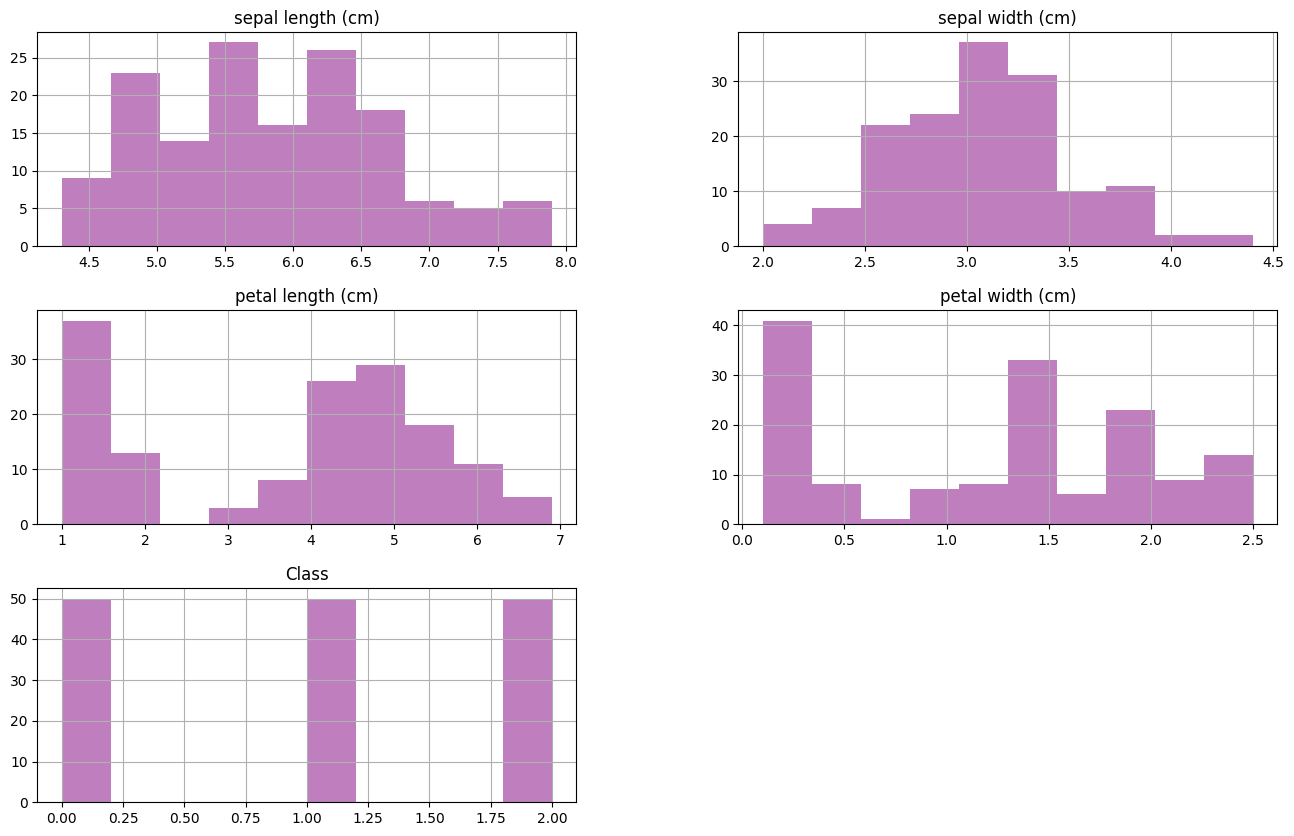

In [8]:
iris_pd.hist(figsize=(16, 10), color='purple', alpha=0.5)

<Axes: >

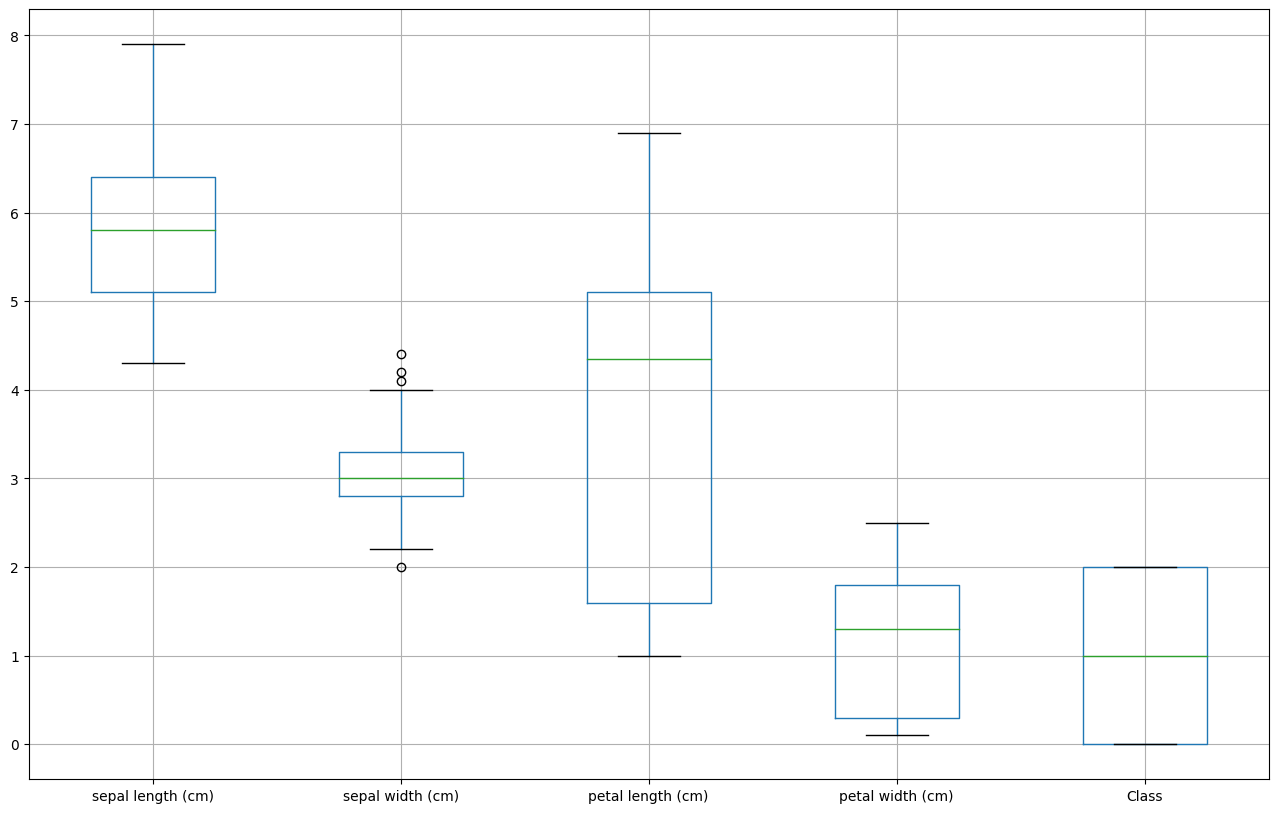

In [9]:
iris_pd.boxplot(figsize=(16, 10))

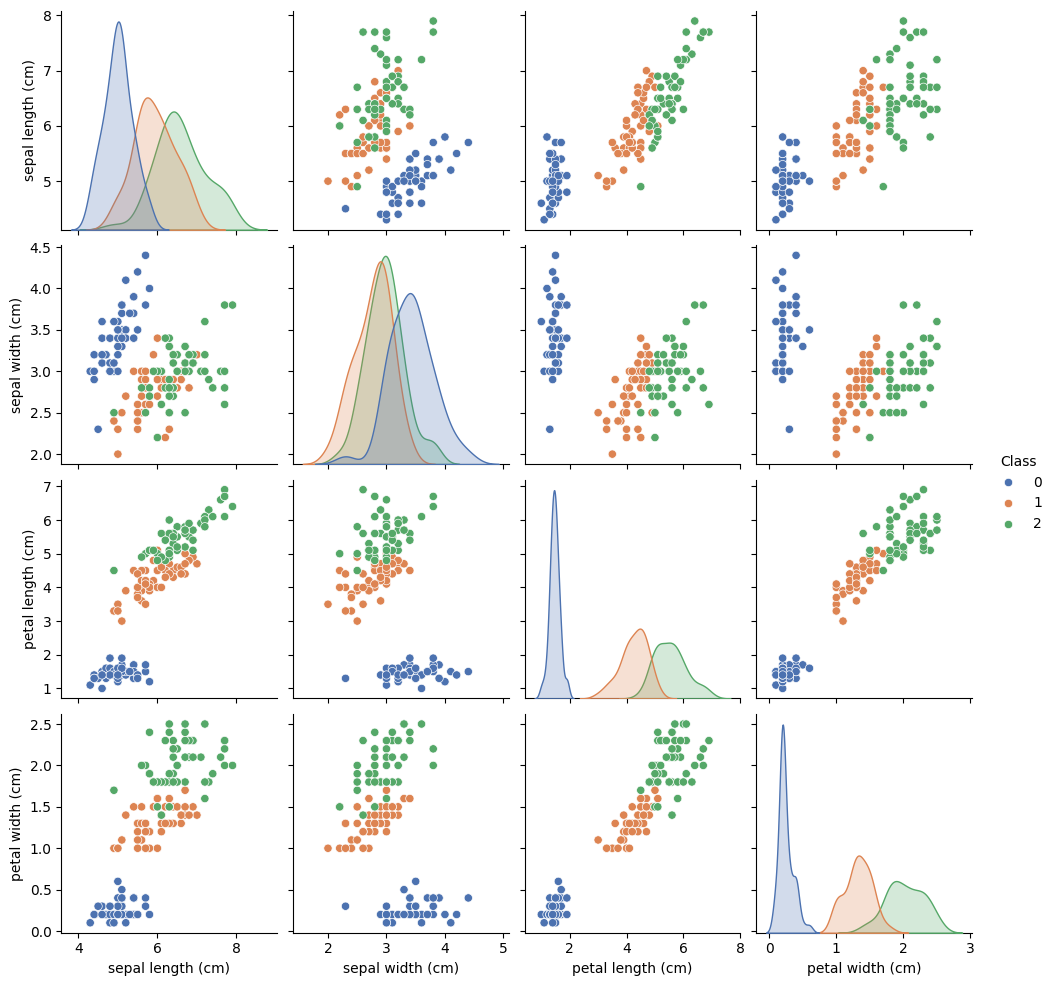

In [10]:
import seaborn as sns

sns.pairplot(iris_pd, hue='Class', palette='deep')

# Funciones utiles

## Límite de desición

In [11]:
def make_meshgrid(X, y, step=.02):
    x = X.iloc[:,0]
    y = X.iloc[:,1]
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))
    return xx, yy

def plot_contours(ax, clf, X, y, **params):
    xx, yy = make_meshgrid(X, y)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.scatter(X.iloc[:,0], X.iloc[:,1], c=y.values, cmap=plt.cm.coolwarm, s=50, edgecolors='k')
    ax.set_ylabel(X.columns[1])
    ax.set_xlabel(X.columns[0])
    ax.set_title(clf.__class__.__name__)
    out = ax.contourf(xx, yy, Z, **params)
    return out

## Matriz de confusión

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def confusion_matrix(clf, y_test, predictions):
  fig, ax = plt.subplots(figsize=(10,8))
  plt.rcParams.update({'font.size': 15})
  #out = plot_confusion_matrix(clf, X, y, display_labels=['Setosa', 'Versicolour', 'Virginica'], cmap = plt.cm.Blues, ax=ax)
  cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
  #disp.plot()
  plt.title("Matriz confusión")
  return disp

## Curva ROC

In [15]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

def ROC(X, y, model):

  # split into train/test sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

  # fit model
  clf = OneVsRestClassifier(model)
  clf.fit(X_train, y_train)
  pred = clf.predict(X_test)
  pred_prob = clf.predict_proba(X_test)
  pred_prob = np.nan_to_num(pred_prob)

  # roc curve for classes
  fpr = {}
  tpr = {}
  thresh ={}

  n_class = 3

  for i in range(n_class):
      fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)

  # plotting
  fig, ax = plt.subplots(figsize=(10,8))
  ax.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Setosa')
  ax.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Versicolour')
  ax.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Virginica')
  ax.plot([0, 1], [0, 1], linestyle='--',color='red', label='No Skill')
  ax.set_title(f'Multiclass ROC curve -  {model.__class__.__name__}')
  ax.set_xlabel('False Positive Rate')
  ax.set_ylabel('True Positive rate')
  ax.grid(True)

  return ax.legend(loc='best')

# Generar modelos

##Selección de características

In [16]:
X = iris_pd.iloc[:,[0,3]]
y = iris_pd.Class
X.head()

,sepal length (cm),petal width (cm)
0,5.1,0.2
1,4.9,0.2
2,4.7,0.2
3,4.6,0.2
4,5.0,0.2


##Regresión logística

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


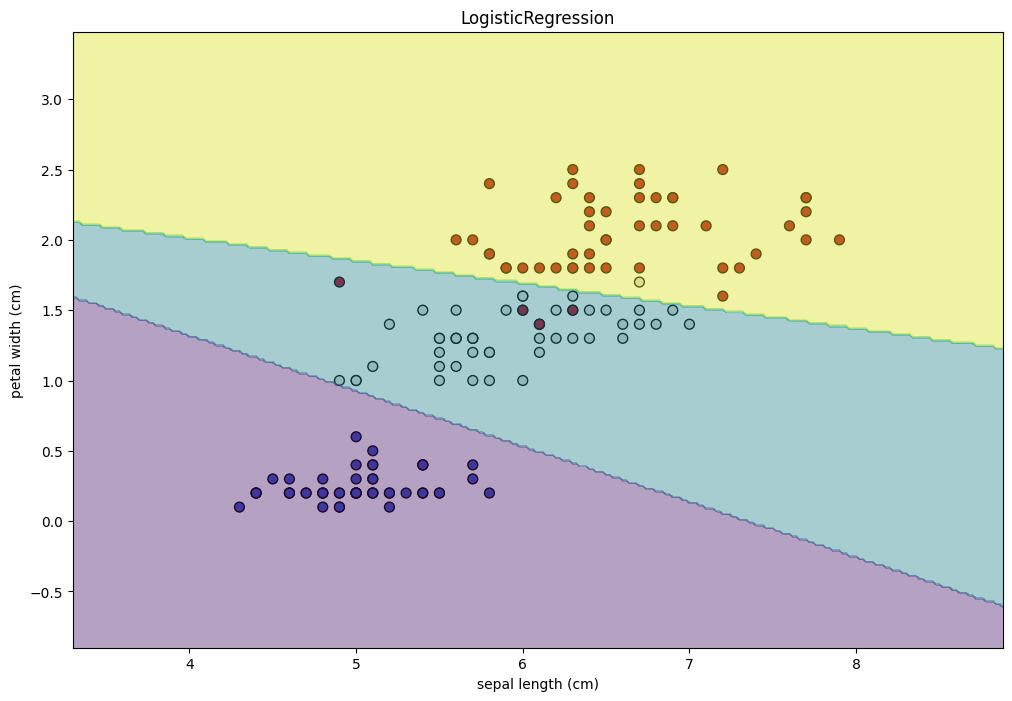

In [17]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()


model.fit(X, y)
predicted=model.predict(X)

fig, ax = plt.subplots(figsize=(12, 8))

plot_contours(ax, model, X, y, alpha=0.4)

In [22]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Class, Length: 150, dtype: int64

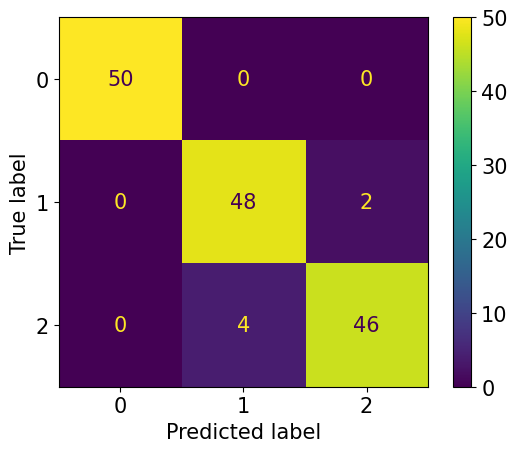

In [30]:
ConfusionMatrixDisplay.from_estimator(model, X, y)
plt.show()

In [31]:
from sklearn import metrics

print(metrics.classification_report(y, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.92      0.96      0.94        50
           2       0.96      0.92      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



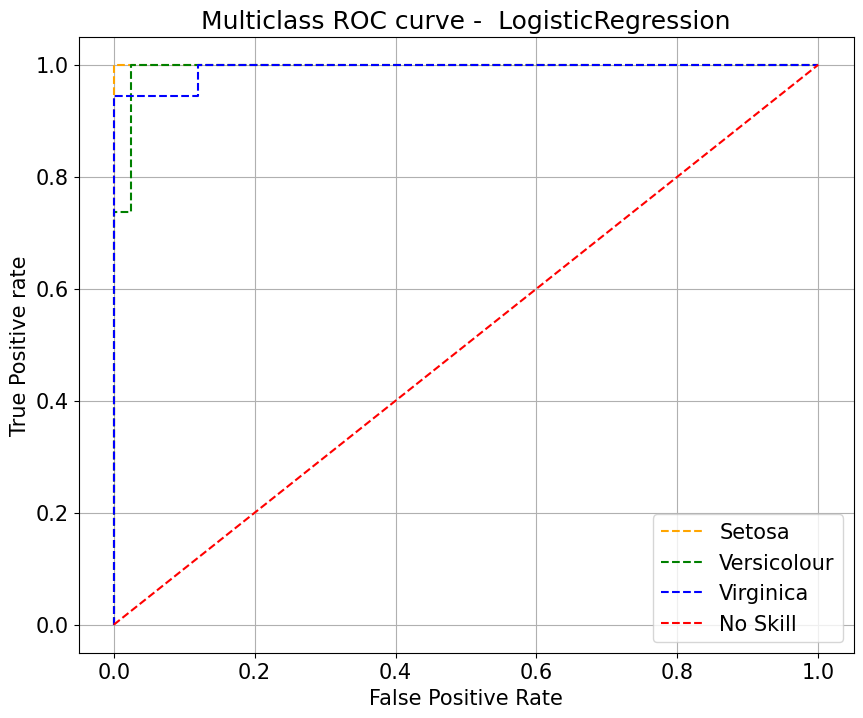

In [32]:
ROC(X,y,model)

## KNN

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


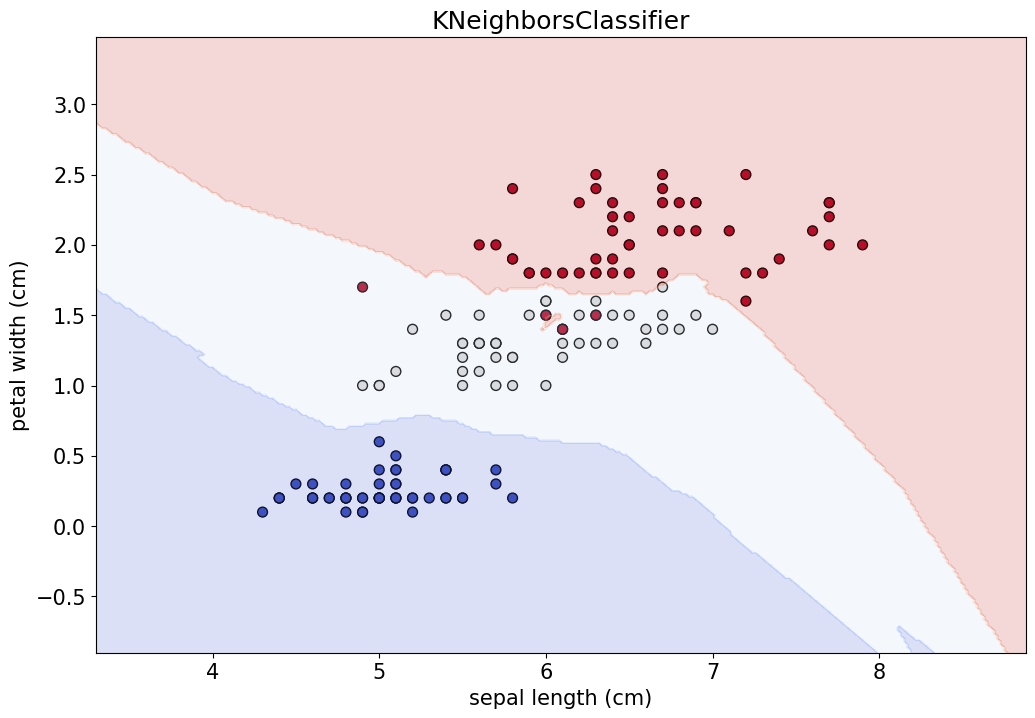

In [39]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)

model.fit(X, y)
predicted = model.predict(X)

fig, ax = plt.subplots(figsize=(12, 8))

plot_contours(ax, model, X, y, cmap=plt.cm.coolwarm, alpha=0.2)

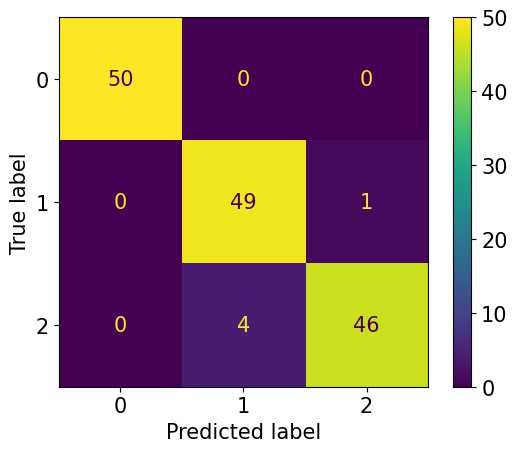

In [40]:
ConfusionMatrixDisplay.from_estimator(model, X, y)
plt.show()

In [41]:
print(metrics.classification_report(y, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.92      0.98      0.95        50
           2       0.98      0.92      0.95        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



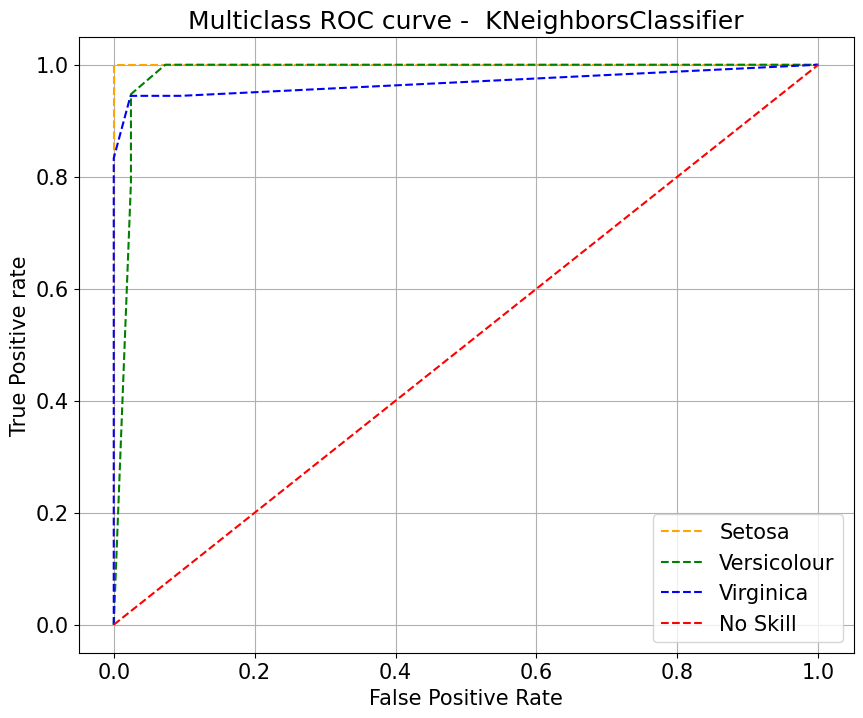

In [42]:
ROC(X,y,model)

## Ramdon forest

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


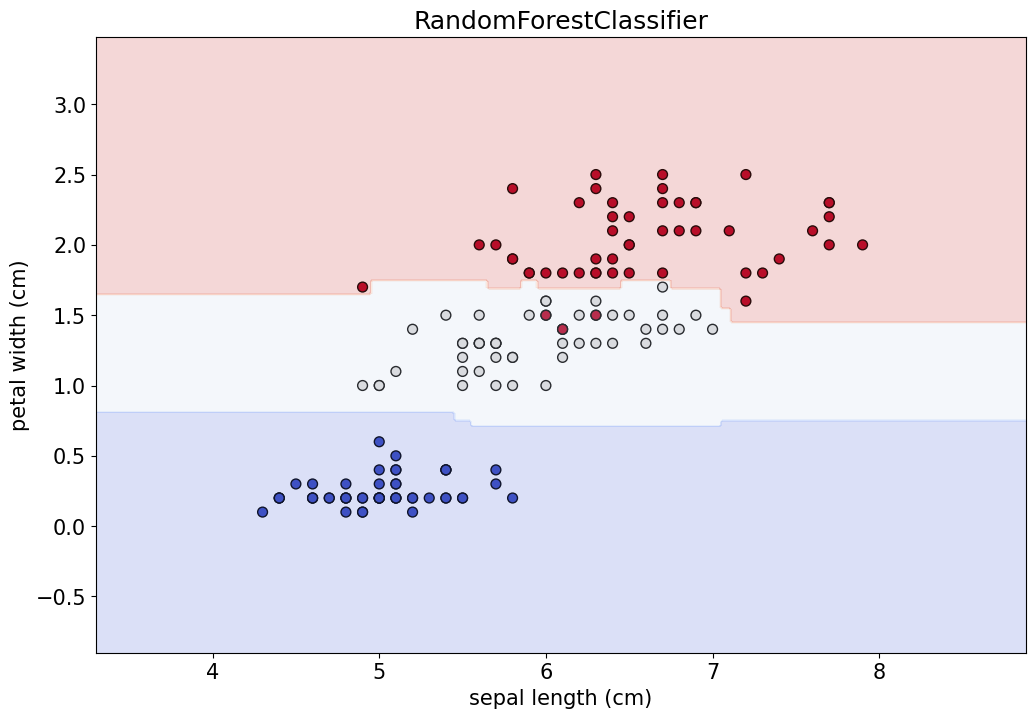

In [50]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(max_depth=4, random_state=0)

model.fit(X, y)
predicted = model.predict(X)

fig, ax = plt.subplots(figsize=(12, 8))

plot_contours(ax, model, X, y, cmap=plt.cm.coolwarm, alpha=0.2)

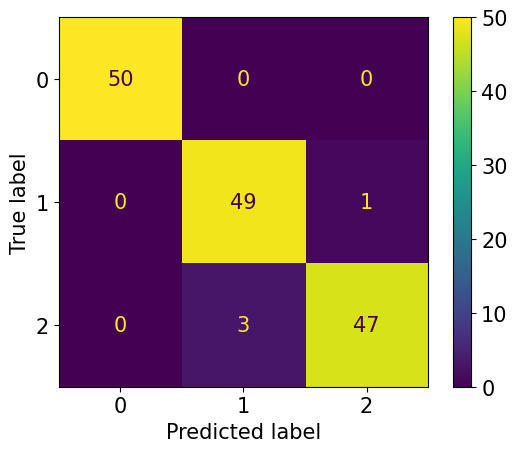

In [51]:
ConfusionMatrixDisplay.from_estimator(model, X, y)
plt.show()

In [52]:
print(metrics.classification_report(y, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.94      0.98      0.96        50
           2       0.98      0.94      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



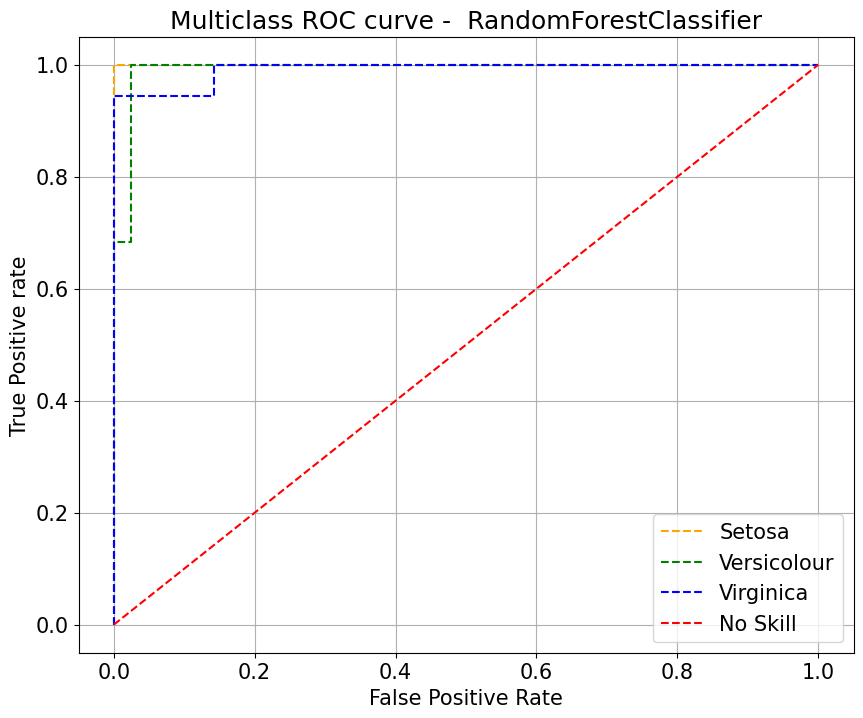

In [53]:
ROC(X,y,model)